Голещихин Олег  
**Прикладная статистика  
Домашнее задание 3**

**Упражнение 2.** Для данных из файла employees.xls постройте гистограмму для переменной Salary. Похоже ли распределение зарплат на нормальный закон? Проверьте нормальность с помощью изученных критериев.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.descriptivestats import sign_test

%matplotlib inline

In [2]:
np.random.seed(111)

In [3]:
data = pd.read_excel('employees.xls')

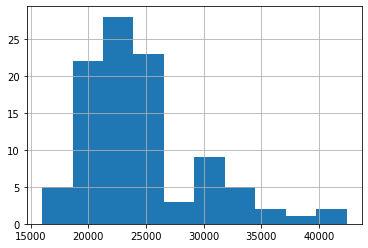

In [4]:
# Построем гистограмму для переменной Salary

plt.hist(data['SALARY'])
plt.grid()
plt.show()

Из гистрограммы явно видно, что данные отличаются от нормального распределения. Как минимум выделяется тяжелый правый хвост.

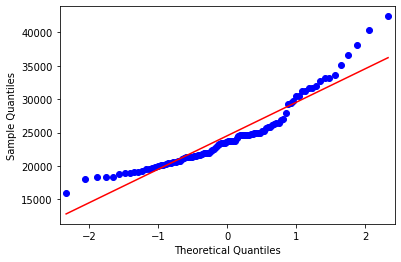

In [5]:
# Построим квантильный график

qqplot(data['SALARY'], dist=stats.norm, line='r')
plt.show()

Как видно из квантильного графика, точки явно не ложатся на одну прямую, что дополнительно подтверждает картину, показанную на гистрограмме: скорее всего, наша выборка пришла не из нормального распределения.

In [6]:
# Проверим нормальность выборки при помощи критерия Шапиро-Уилка

stats.shapiro(data['SALARY'])

(0.9015016555786133, 1.6645467439957429e-06)

Значение p-value для рассчитанной статистики критерия оказалось порядка $10^{-6}$, критерий Шапиро-Уилка отвергает гипотезу о том, что наша выборка пришла из нормального распределения.

In [7]:
# Проверим нормальность выборки при помощи критерия Харке-Бера

stats.jarque_bera(data['SALARY'])

(34.06327990738705, 4.011000820369759e-08)

Значение p-value для рассчитанной статистики критерия оказалось порядка $10^{-8}$, критерий Харке-Бера отвергает гипотезу о том, что наша выборка пришла из нормального распределения.

**Вывод.** Оба рассмотренных критерия отвергают гипотезу о том, что выборка значений заработной платы пришла из нормального распределения, квантильный график также говорит в пользу того, что перед нами выборка не из нормального распределения.

**Упражнение 3.** Методом перебора найдите наиболее подходящий тип распределения для выборки, содержащейся в файле sample.csv. Сначала постройте гистограмму, чтобы получить представление о форме плотности распределения. Затем изучите квантильные графики для разных распределений. Если будет такая возможность попробуйте применить какие-то критерии согласия.

In [8]:
data_t2 = pd.read_csv('sample.csv')
sample = data_t2.values.reshape(-1)
sample.shape

(100,)

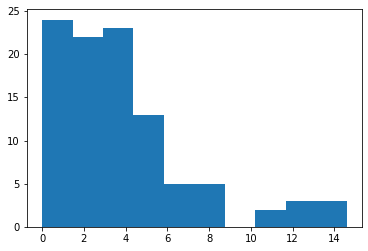

In [9]:
plt.hist(sample)
plt.show()

Однозначно предположить распределение, из которого пришла данная выборка по гистраграмме сложно. Тем не менее, видно, что картина не соответствует нормальному и равномерному распределению. Но есть определенное сходство с экспоненциальным распределением: мы видим большие значения в левой части гистрограммы, которые затем быстро убывают.

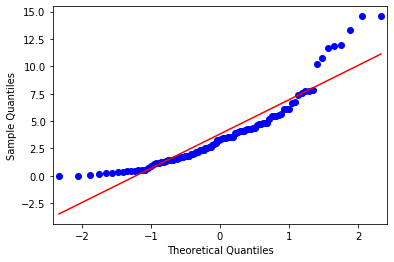

In [10]:
# построим квантильный график для нормального распределения

qqplot(sample, dist=stats.norm, line='r')
plt.show()

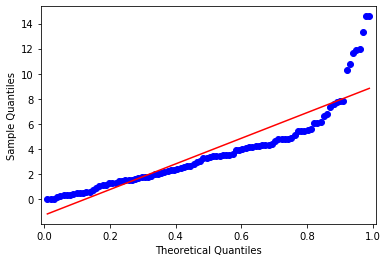

In [11]:
# построим квантильный график для равномерного распределения

qqplot(sample, dist=stats.uniform, line='r')
plt.show()

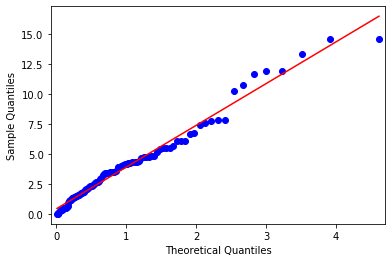

In [12]:
# построим квантильный график для экспоненциального распределения

qqplot(sample, dist=stats.expon, line='r')
plt.show()

Как видно из представленных выше графиков, визуально наша выборка больше всего соответствует (хотя и не идеально) экспоненциальному распределению.

In [13]:
# Выполним проверку на экспоненциальность

s = np.sum(sample)
vec = []
for i in range(1, len(sample)):
    vec.append(np.sum(sample[:i])/s)
vec = np.array(vec)

stats.kstest(rvs=vec, cdf=stats.uniform.cdf)

KstestResult(statistic=0.07002123333746968, pvalue=0.7238202721939277)

**Вывод.** Мы получили p-value 0.72. Значит, критерий Колмогорова не отвергает гипотезу о том, что наша новая выборка, полученная на основе исходной, пришла из равномерного распределения на отрезке [0, 1]. А это, в свою очередь, означает, что гипотеза о том, что наша исходная выборка пришла из экспоненциального распределения также не отвергается.

**Упражнение 4.** В файле anorexia.txt записан вес пациентов до начала терапии анарексии и после ее окончания. Была терапия эффективна?

In [14]:
anorexia = pd.read_csv('anorexia.txt', delimiter='\t')
anorexia.head()

,Before,After
0,80.5,82.2
1,84.9,85.6
2,81.5,81.4
3,82.6,81.9
4,79.9,76.4


Поскольку в выборках у нас представлены результаты наблюдения за одними и теми же людьми до и после терапии, то данные выборки являются зависимыми.

In [15]:
# создадим два numpy array, содержащих наши выборки

before = anorexia['Before'].to_numpy()
after = anorexia['After'].to_numpy()

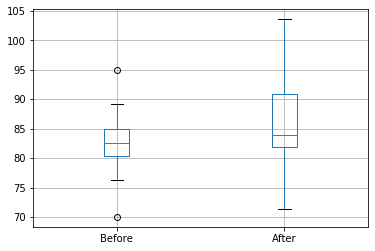

In [16]:
# визуализируем наши данные при помощи boxplot

anorexia.boxplot()
plt.show()

Как видно из графика, пространство значений выборки after содержит в себе пространство значений выборки before (кроме одного выброса), при этом дисперсия выборки before заметно меньше, чем у выборки after, а медианы практически совпадают. Исходя из имеющейся картины, однозначный вывод о том, что терапия была эффективной, сделать нельзя.

In [17]:
# используем критерий знаков, чтобы проверить гипотезу о том, что выборки пришли из одного распределения

sign_test(before-after)

(-3.5, 0.26493089646101)

Критерий знаков показал p-value равное 0.26, что не позволяет нам отвергнуть нулевую гипотезу о том, что выборки пришли из одного распределения. А значит, критерий знаков говорит, что, скорее всего, статистически значимых различий между выборками нет.

<function matplotlib.pyplot.show(*args, **kw)>

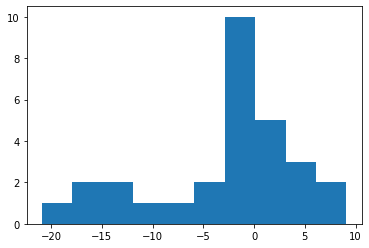

In [18]:
# попробуем оценить симметричность распределения остатков при помощи гистрограммы

plt.hist(before-after)
plt.show

Скорее всего, остатки не имеют симметричного распределния, тем не менее все же попробуем применить к нашим выборкам критерий Уилкоксона.

In [19]:
stats.wilcoxon(before, after)

WilcoxonResult(statistic=131.5, pvalue=0.06291972262602667)

In [74]:
# поскольку предполагается, что препарат должен помогать в борьбе с анарексией (а значит, 
# у людей после лечения должен увеличиться вес), попробуем также рассмотреть односторонний критерий

stats.wilcoxon(before, after, alternative='less')

WilcoxonResult(statistic=131.5, pvalue=0.031459861313013336)

На уровне значимости 5% критерий Уилкоксона также не отвергает нулевую гипотезу о том, выборки пришли из одного распределения (отсутствует систематический сдвиг). Хотя в данном случае p-value получилось уже значительно меньше, чем для критерия знаков. А вот одностронний критерий на уровне значимости 5% уже отвергает нулевую гипотезу в пользу альтернативы, состоящей в том, что выборка after стохастически доминирует выборку before. Но, опять же, в данном примере остатки, скорее всего, не имеют нормального распределения, поэтому критерий Уилкоксона может работать не вполне корректно.

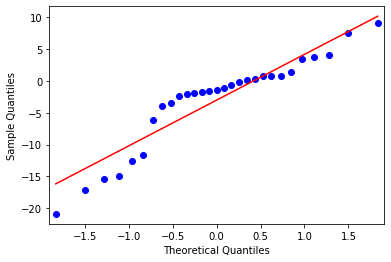

In [30]:
# попробуем также использовать двухвыборочный t-критерий для зависимых выборок, 
# для этого сначала проверим наши данные на нормальность

qqplot(before-after, line='s')
plt.show()

In [27]:
stats.shapiro(before-after)

(0.8961783051490784, 0.007945147342979908)

Критерий Шапиро-Уилка и квантильный график говорят о том, что наши данные, скорее всего, не имеют нормального распределения. Тем не менее посмотрим на t-критерий.

In [28]:
stats.ttest_rel(before, after)

Ttest_relResult(statistic=-2.215587843931166, pvalue=0.03502259756218883)

Как мы видим t-критерий уже отвергает гипотезу о том, что выборки пришли из одного распределения, на уровне значимости 5%. Однако, как уже отмечалось, его использование в данном случае представляется не вполне корректным.

In [29]:
# попробуем также оценить параметр сдвига

np.median(before-after)

-1.3999999999999915

**Выводы.** Терапия, скорее, была неэффективна. Об этом говорит и boxplot, и критерий знаков, и оценка параметра сдвига (которая оказалась близка к нулю с учетом величины значений, принимаемых элеменетами выборок). Критерий Уилкоксона менее однозначен, но на уровне значимости 5%, также говорит о том, что статистически значимой разницы между выборками нет. При этом использование критерия Уилкоксона в данном случае представляется не совсем корректным. t-критерий в данном случае использовать не следует, так как не подтверждается предположение о нормальности данных.

**Упражнение 5.** В файле seattle.txt записаны цены на недвижимость в одном из районов Сиэтла в 2001 году и в 2002 году (объекты недвижимости выбирались случайно). Изменились ли в среднем цены в этом районе за год?

Заметим, что поскольку по условию задачи объекты недвижимости выбирались случайно, в данном случае нам даны независимые выборки.

In [32]:
seattle = pd.read_csv('seattle.txt', sep='\t')
y2001 = seattle['Price'][seattle['Year']==2001].to_numpy()
y2002 = seattle['Price'][seattle['Year']==2002].to_numpy()

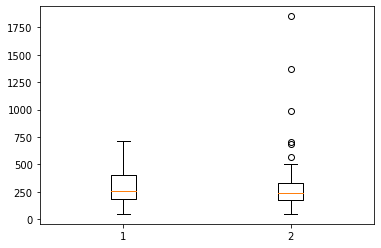

In [33]:
# Для начала посмотрим на данные с помощью boxplot

plt.boxplot([y2001, y2002])
plt.show()

Как мы видим из графика, за исключением нескольких "очень дорогих" выбросов, относящихся к 2002 году, значения, принимаемые выборками лежат примерно в одном диапазоне, и медианы у них примерно равные. Выборка 2002 года характерезуется меньшим разбросом значений (если не учитывать те самые выбросы).

In [34]:
# посмотрим на критерий Колмогорова-Смирнова (считаем, что имеем дело с непрерывными распределениями)

stats.ks_2samp(y2001, y2002)

Ks_2sampResult(statistic=0.14, pvalue=0.7166468440414822)

Критерий Колмагорова-Смирнова не отвергает нулевую гипотезу о том, что выборки имеют одинаковое распределение.

In [79]:
# посмотрим на критерий Манна-Уитни

stats.mannwhitneyu(y2001, y2002, alternative='two-sided')

MannwhitneyuResult(statistic=1295.5, pvalue=0.7563872675701748)

Критерий Манна-Уитни также не отвергает нулевую гипотезу о том, что выборки пришли из одного и того же распределения.

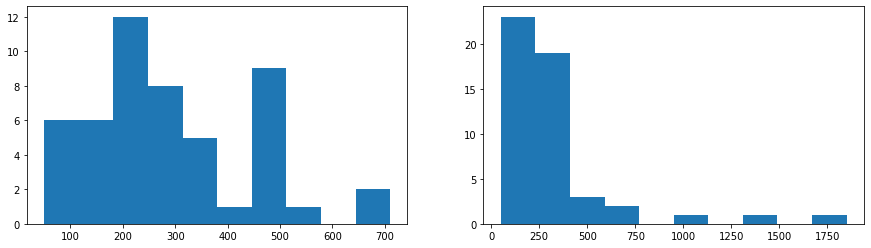

In [36]:
# проверим наши выборки на нормальность

fig, ax = plt.subplots(ncols=2, figsize=(15, 4))
ax[0].hist(y2001)
ax[1].hist(y2002)
plt.show()

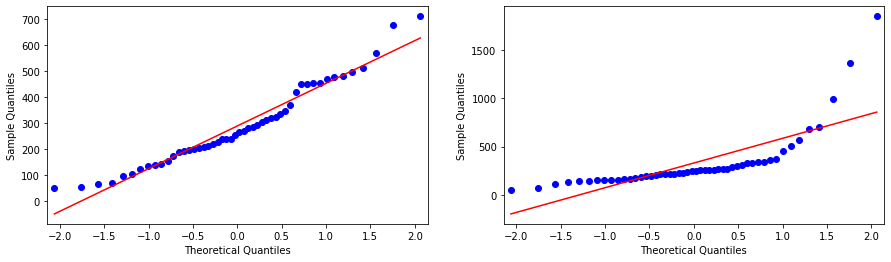

In [37]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 4))
qqplot(y2001, ax=ax[0], line='r')
qqplot(y2002, ax=ax[1], line='r')
plt.show()

In [38]:
print(stats.shapiro(y2001))
print(stats.shapiro(y2002))

(0.9515296220779419, 0.03943965956568718)
(0.6063637733459473, 2.4237015172623444e-10)


Как видно, данные в наших выборках, скорее всего, не имеют нормального распределения. Тем не менее рассмотрим двухвыборочный t-критерий для независимых выборок.

In [80]:
stats.ttest_ind(y2001, y2002, equal_var=False)

Ttest_indResult(statistic=-0.8057258725189664, pvalue=0.42305786816462276)

Как мы видим, критерий Стьюдета также не отвергает гипотезу о том, что выборки пришли из одого и того же распределения. Но его использование в данной ситуации представляется некорректным.

In [40]:
# также оценим параметр сдвига

np.median([[y2001[i]-y2002[j] for j in range(len(y2002))] for i in range(len(y2001))])

8.149999999999999

In [81]:
# посмотрим еще на значения критериев, если избавиться от выбросов в 2002 году

y2002_ = y2002[y2002<500]
print(stats.ks_2samp(y2001, y2002_))
print(stats.mannwhitneyu(y2001, y2002_, alternative='two-sided'))

Ks_2sampResult(statistic=0.2441860465116279, pvalue=0.10390396594248041)
MannwhitneyuResult(statistic=1287.5, pvalue=0.10233580034695816)


**Выводы.** Критерии Колмагорова-Смирнова и Манна-Уитни не отвергают гипотезу о том, что выборки пришли из одинакового распределения. Скорее всего, в среднем за рассматриваемый год цены недвижимости в данном районе Сиэтла статистически значимо не изменились.

**Упражнение 6.** В рамках исследования эффективности препарата метилфенидат пациент с синдромом дефицита внимания и гиперактивности в течение недели принимал либо метилфенидат, либо плацебо. В конце недели каждый пациент проходил тест на способность к подавлению импульсивных поведенческих реакций. На втором этапе плацебо и препарат менялись, и после недельного курса каждый испытуемый проходил второй тест. Был ли эффект от применения препарата? Данные находятся в файле methylphenidate.txt.

Так как оба теста проводятся с одним и тем же испытуемым, мы имеем дело с зависимыми выборками.

In [45]:
tests = pd.read_csv('methylphenidate.txt', sep=' ')
tests.head()

,Placebo,Methylphenidate
0,57,62
1,27,49
2,32,30
3,31,34
4,34,38


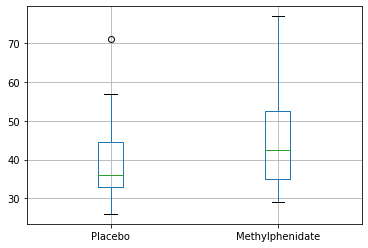

In [46]:
# оценим наши выборки визуально

tests.boxplot()
plt.show()

Как мы видим, значения выборок находятся примерно в одном диапозоне, при этом разброс значений по выборке "метилфенидат" заметно больше.

In [47]:
# создадим два numpy array, содержащих наши выборки

plac = tests['Placebo'].to_numpy()
meth = tests['Methylphenidate'].to_numpy()

In [48]:
# используем критерий знаков

sign_test(plac-meth)

(-5.0, 0.06391465663909912)

На уровне значимости 5% критерий знаков не отвергает нулевую гипотезу о том, что наши выборки не содержат статистически значимых различий.

<function matplotlib.pyplot.show(*args, **kw)>

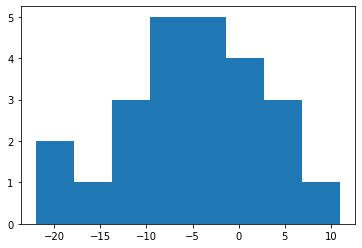

In [49]:
# попробуем оценить симметричность распределения остатков при помощи гистрограммы

plt.hist(plac-meth, bins=8)
plt.show

Однозначно говорить о том, что остатки имеют симметричное распределение сложно. Тем не менее применим к нашим данным критерий Уилкоксона.

In [50]:
stats.wilcoxon(plac, meth)

WilcoxonResult(statistic=48.5, pvalue=0.003707013753450903)

In [73]:
# поскольку предполагается, что препарат должен помогать тестируемым (а значит, 
# у людей, принимавших препарат оценки за тест должны быть выше, чем у тех, кто принимал плацебо), 
# попробуем также рассмотреть односторонний критерий

stats.wilcoxon(plac, meth, alternative='less')

WilcoxonResult(statistic=48.5, pvalue=0.0018535068767254516)

Критерий Уилкоксона говорит о том, что между выборками есть статистически значимые отличия. Односторонний критерий отвергает нулевую гипотезу о том, что выборки пришли из одного распределения, в пользу альтерантивы, которая состоит в том, что выборка meth (т.е. оценки тестируемых, принимавших препарат) стохастически доминирует выборку plac (т.е. оценки тех людей, кто принимал плацебо).

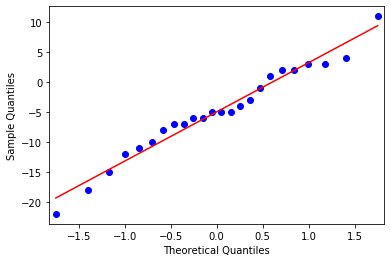

In [52]:
# также проверим наши данные на нормальность

qqplot(plac-meth, line='r')
plt.show()

In [53]:
stats.shapiro(plac-meth)

(0.9798052906990051, 0.8922504186630249)

Критерий Шапиро-Уилка не отвергает нулевую гипотезу о том, что разность данных выборок пришла из нормального распределения. Тогда применим к нашим данным критерий Стьюдента.

In [54]:
stats.ttest_rel(plac, meth)

Ttest_relResult(statistic=-3.2223624451230406, pvalue=0.003771488176381471)

Критерий Стьюдента, как и критерий Уилкоксона, говорит о том, что между выборками есть статистически значимые отличия.

In [55]:
# оценим также параметр сдвига

np.median(plac-meth)

-5.0

**Вывод.** Критерий Уилкоксона (который, наверное, не совсем корректно использовать в данном случае, так как не наблюдается очевидная симметрия остатков) и критерий Стьюдента (к которому нужно относиться с осторожностью, так как это параметрический критерий) говорят, что между выборками есть статистически значимые отличия. Критерий знаков, говорит, что таких отличий нет (для уровня значимости 5%), но его p-value равняется 0.064, и значит, он отвергнет нулевую гипотезу уже на уроне 7%. Сделаем вывод, что, скорее всего, выборки пришли из разных распределений, и люди, которым давали препарат, в среднем, набирают на тестах на 5 баллов больше, чем люди, которым давали плацебо. Все это говорит в пользу эффективности препарата.

**Упражнение 7.** В файле mtcars.csv находятся данные из американского журнала Motor Trend 1974 года. Они описывают расход топлива в зависимости от 10 характеристик автомобиля (все автомобили 1973-1974 года). Влияет ли тип двигателя на расход топлива? А тип коробки передач?

Поскольку мы будем сравнивать расход топлива у автомобилей с двумя разными типами двигаетелей и с двумя разными типами коробок передач (то есть у разных автомобилей), то наши выборки (расхода топлива) в данном случае будут являться независимыми.

In [56]:
cars = pd.read_csv('mtcars.csv', index_col=0)
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [57]:
mpg_v = cars['mpg'][cars['vs']==0].to_numpy() # расход топлива у машин с V-образным двигателем
mpg_s = cars['mpg'][cars['vs']==1].to_numpy() # расход топлива у машин с рядным двигателем
mpg_a = cars['mpg'][cars['am']==0].to_numpy() # расход топлива у машин с АКП
mpg_m = cars['mpg'][cars['am']==1].to_numpy() # расход топлива у машин с МКП

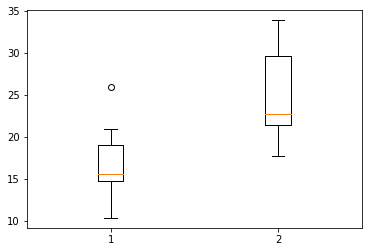

In [58]:
# сначала оценим наши данные визуально

plt.boxplot([mpg_v, mpg_s])
plt.show()

Значения расхода топлива для автомобилей с разными типами двигателей заметно различаются.

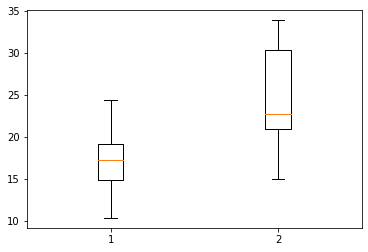

In [59]:
plt.boxplot([mpg_a, mpg_m])
plt.show()

Похожую картину можно видеть и для разных типов коробок передач, хотя в этом случае уже больше данных лежат в одном диапазоне для каждой из выборок.

In [60]:
# посмотрим на критерий Колмогорова-Смирнова (считаем, что имеем дело с непрерывными распределениями)

print('Критерий Колмогорова-Смирнова для разных типов двигателей:\n', stats.ks_2samp(mpg_v, mpg_s))
print('Критерий Колмогорова-Смирнова для разных типов КП:\n', stats.ks_2samp(mpg_a, mpg_m))

Критерий Колмогорова-Смирнова для разных типов двигателей:
 Ks_2sampResult(statistic=0.7301587301587301, pvalue=0.0001328071108759321)
Критерий Колмогорова-Смирнова для разных типов КП:
 Ks_2sampResult(statistic=0.6356275303643725, pvalue=0.001940124407842636)


In [72]:
# посмотрим также на односторонний критерий Колмогорова-Смирнова

print(stats.ks_2samp(mpg_v, mpg_s, alternative='greater'))
print(stats.ks_2samp(mpg_a, mpg_m, alternative='greater'))

Ks_2sampResult(statistic=0.7301587301587301, pvalue=6.640355543790075e-05)
Ks_2sampResult(statistic=0.6356275303643725, pvalue=0.0009700622039210809)


В обоих случаях критерий Колмогорова-Смирнова отвергает гипотезу о том, что между выборками нет статистически значимых различий, а значит можно сделать выводы, что и тип двигателя и тип КП значимо влияют на расход топлива. Односторонний критерий говорит о том, что расстояние, которое машина проезжает на 1 галлон топлива, в среднем меньше в случае с V-образными двигателями и АКП (т.е. отвергает нулевую гипотезу о том, что выборки пришли из одинакового распределения в пользу указанной альтернативы).

In [82]:
# посмотрим на критерий Манна-Уитни

print('Критерий Манна-Уитни для разных типов двигателей:\n', stats.mannwhitneyu(mpg_v, mpg_s, alternative='two-sided'))
print('Критерий Манна-Уитни для разных типов КП:\n', stats.mannwhitneyu(mpg_a, mpg_m, alternative='two-sided'))

Критерий Манна-Уитни для разных типов двигателей:
 MannwhitneyuResult(statistic=22.5, pvalue=9.034471700053182e-05)
Критерий Манна-Уитни для разных типов КП:
 MannwhitneyuResult(statistic=42.0, pvalue=0.0018713913331785542)


In [66]:
# посмотрим также на односторонний критерий Манна-Уитни

print(stats.mannwhitneyu(mpg_v, mpg_s, alternative='less'))
print(stats.mannwhitneyu(mpg_a, mpg_m, alternative='less'))

MannwhitneyuResult(statistic=22.5, pvalue=4.517235850026591e-05)
MannwhitneyuResult(statistic=42.0, pvalue=0.0009356956665892771)


Критерий Манна-Уитни также отвергает нулевую гипотезу о том, что выборки пришли из одного распределения и в случае с типами двигателей, и в случае с коробками передач. Односторонний критерий отвергает нулевую гипотезу о том, что выборки пришли из одного распределения в пользу альтернативы, которая состоит в том, что расстояние, которое машина проезжает на 1 галлон топлива, в среднем меньше в случае с V-образными двигателями и АКП.

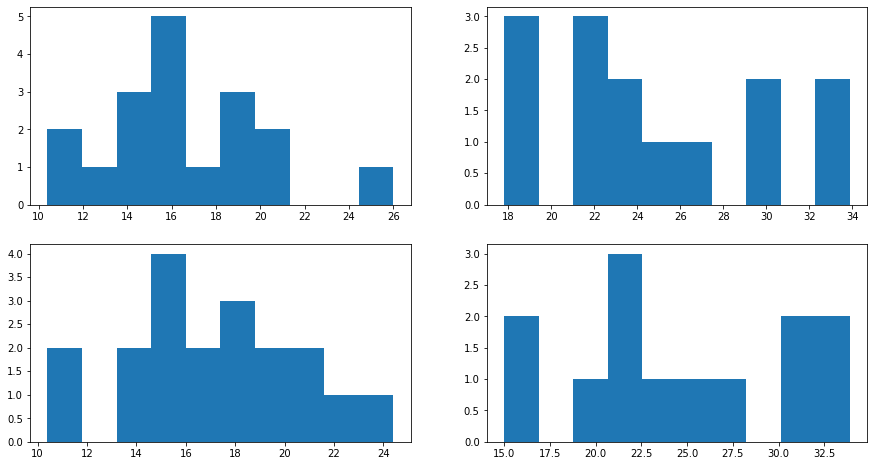

In [67]:
# на всякий случай, проверим наши данные на нормальность (и на возможность использования критерия Стьюдента)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
ax[0, 0].hist(mpg_v)
ax[0, 1].hist(mpg_s)
ax[1, 0].hist(mpg_a)
ax[1, 1].hist(mpg_m)
plt.show()

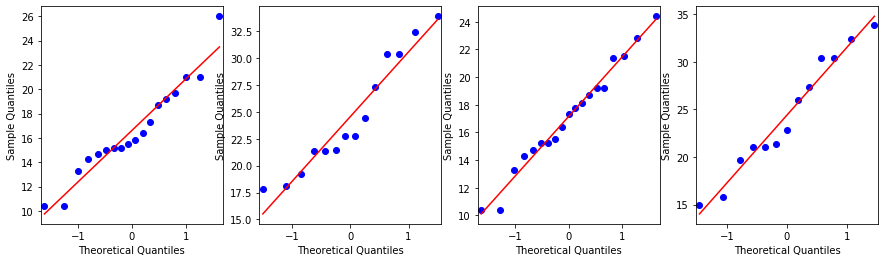

In [68]:
fig, ax = plt.subplots(ncols=4, figsize=(15, 4))
qqplot(mpg_v, ax=ax[0], line='r')
qqplot(mpg_s, ax=ax[1], line='r')
qqplot(mpg_a, ax=ax[2], line='r')
qqplot(mpg_m, ax=ax[3], line='r')
plt.show()

In [69]:
print(stats.shapiro(mpg_v))
print(stats.shapiro(mpg_s))
print(stats.shapiro(mpg_a))
print(stats.shapiro(mpg_m))

(0.9515073299407959, 0.44915100932121277)
(0.9116623401641846, 0.16659046709537506)
(0.976774275302887, 0.8987362384796143)
(0.9458035230636597, 0.536271333694458)


Для всех четырех выборок критерий Шапиро-Уилка не отвергает гипотезу о том, что эти данные пришли из нормального распределения. Тогда воспользуемся также критерием Стьюдента.

In [83]:
print('Критерий Стьюдента для разных типов двигателей:\n', stats.ttest_ind(mpg_v, mpg_s, equal_var=False))
print('Критерий Стьюдента для разных типов КП:\n', stats.ttest_ind(mpg_a, mpg_m, equal_var=False))

Критерий Стьюдента для разных типов двигателей:
 Ttest_indResult(statistic=-4.667052730251419, pvalue=0.00010983680112365942)
Критерий Стьюдента для разных типов КП:
 Ttest_indResult(statistic=-3.767123145144923, pvalue=0.0013736383330710345)


Как и два предыдущих критерия, критерий Стьюдента отвергает гипотезу о том, что выборки пришли из одного распределения.

In [71]:
# также оценим параметры сдвига

print('Оценка параметра сдвига для разных типов двигателей:')
print(np.median([[mpg_v[i]-mpg_s[j] for j in range(len(mpg_s))] for i in range(len(mpg_v))]))
print()
print('Оценка параметра сдвига для разных типов КП:')
print(np.median([[mpg_a[i]-mpg_m[j] for j in range(len(mpg_m))] for i in range(len(mpg_a))]))

Оценка параметра сдвига для разных типов двигателей:
-7.3500000000000005

Оценка параметра сдвига для разных типов КП:
-6.800000000000001


В среднем, автомобили с V-образными двигателями проезжают за 1 галлон топлива на 7.3 мили меньше, чем автомобили с рядными двигателями.
В среднем, автомобили с автоматической коробкой передач проезжают за 1 галлон топлива на 6.8 миль меньше, чем автомобили с механической коробкой передач.

**Выводы.** Все три использованных критерия показали, что и в случае с типом двигателя, и в случае с типом коробки передач, между расходами топлива соответствующих автомобилей существует статистически значимая разница. Расход топлива на единицу расстояния больше у автомобилей с V-образным двигателем и с автоматической коробкой передач.